<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Phase3-Project" data-toc-modified-id="Phase3-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Phase3 Project</a></span><ul class="toc-item"><li><span><a href="#Business-Objective" data-toc-modified-id="Business-Objective-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Business Objective</a></span></li></ul></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Checking-for-Null-values" data-toc-modified-id="Checking-for-Null-values-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Checking for Null values</a></span></li><li><span><a href="#Checking-the-datatypes" data-toc-modified-id="Checking-the-datatypes-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Checking the datatypes</a></span><ul class="toc-item"><li><span><a href="#Numeric-data" data-toc-modified-id="Numeric-data-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Numeric data</a></span></li><li><span><a href="#Categorical-data" data-toc-modified-id="Categorical-data-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Categorical data</a></span></li></ul></li><li><span><a href="#Checking-for-duplicate-data" data-toc-modified-id="Checking-for-duplicate-data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Checking for duplicate data</a></span></li></ul></li><li><span><a href="#Mapping-waterpump-distribution" data-toc-modified-id="Mapping-waterpump-distribution-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Mapping waterpump distribution</a></span></li><li><span><a href="#Encoding" data-toc-modified-id="Encoding-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Encoding</a></span><ul class="toc-item"><li><span><a href="#Label-encoding-approach" data-toc-modified-id="Label-encoding-approach-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Label encoding approach</a></span></li><li><span><a href="#One-hot-encoding" data-toc-modified-id="One-hot-encoding-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>One-hot encoding</a></span></li></ul></li><li><span><a href="#Building-baseline-models" data-toc-modified-id="Building-baseline-models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Building baseline models</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#KNN-model" data-toc-modified-id="KNN-model-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>KNN model</a></span></li><li><span><a href="#Selecting-a-model" data-toc-modified-id="Selecting-a-model-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Selecting a model</a></span></li></ul></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Decision Tree</a></span><ul class="toc-item"><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span><ul class="toc-item"><li><span><a href="#max_depth" data-toc-modified-id="max_depth-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>max_depth</a></span></li><li><span><a href="#min_samples_split" data-toc-modified-id="min_samples_split-8.1.2"><span class="toc-item-num">8.1.2&nbsp;&nbsp;</span>min_samples_split</a></span></li><li><span><a href="#min_samples_leaf" data-toc-modified-id="min_samples_leaf-8.1.3"><span class="toc-item-num">8.1.3&nbsp;&nbsp;</span>min_samples_leaf</a></span></li><li><span><a href="#model-with-optimized-parameters" data-toc-modified-id="model-with-optimized-parameters-8.1.4"><span class="toc-item-num">8.1.4&nbsp;&nbsp;</span>model with optimized parameters</a></span></li></ul></li><li><span><a href="#feature_importance" data-toc-modified-id="feature_importance-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>feature_importance</a></span><ul class="toc-item"><li><span><a href="#extracting-top_10-features" data-toc-modified-id="extracting-top_10-features-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>extracting top_10 features</a></span></li></ul></li><li><span><a href="#Decision-Tree-with-the-top10-features" data-toc-modified-id="Decision-Tree-with-the-top10-features-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Decision Tree with the top10 features</a></span><ul class="toc-item"><li><span><a href="#GridSearch-CV" data-toc-modified-id="GridSearch-CV-8.3.1"><span class="toc-item-num">8.3.1&nbsp;&nbsp;</span>GridSearch CV</a></span></li></ul></li></ul></li><li><span><a href="#Random-Forest-with-top10-features" data-toc-modified-id="Random-Forest-with-top10-features-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Random Forest with top10 features</a></span></li><li><span><a href="#Visualize-scores" data-toc-modified-id="Visualize-scores-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Visualize scores</a></span><ul class="toc-item"><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Confusion Matrix</a></span></li></ul></li><li><span><a href="#Random-Forest-with-all-the-features" data-toc-modified-id="Random-Forest-with-all-the-features-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Random Forest with all the features</a></span><ul class="toc-item"><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Confusion matrix</a></span></li></ul></li><li><span><a href="#Examining-the-target-feature" data-toc-modified-id="Examining-the-target-feature-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Examining the target feature</a></span></li><li><span><a href="#Training-a-model-with-a-balanced-data-set" data-toc-modified-id="Training-a-model-with-a-balanced-data-set-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Training a model with a balanced data set</a></span><ul class="toc-item"><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>Confusion Matrix</a></span></li></ul></li><li><span><a href="#Random-forest-model-on-the-balanced-dataset" data-toc-modified-id="Random-forest-model-on-the-balanced-dataset-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Random forest model on the balanced dataset</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></div>

# Phase3 Project

## Business Objective

**To help the Goverment of Tanzania monitor the condition of installed waterpumps across the country.Given a set of parameters, the model should be able to predict the status of a waterpump. Status can be as classified as:** 

1. Functional
2. Functional needs repair
3. non functional
    


# Dataset

Dataset sourced from: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# EDA

In [2]:
# importing dataset
df = pd.read_csv('waterwell.csv')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

## Checking for Null values

In [4]:
# checking for null values and returning it as a pandas series
empty=df.isna().sum()
empty

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [5]:
#converting the empty series into a dictionary
empty_dict = dict(empty)

#looping thru dictionary to isolate the columns that have null values
empty_list =[]
for key,value in empty_dict.items():
    if value != 0:
        empty_list.append(key)
        
empty_list
# we now have the list of columns that have null values

['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit']

In [6]:
# examining those columns
df_empty = df[empty_list]
df_empty

,funder,installer,subvillage,public_meeting,scheme_management,scheme_name,permit
0,Roman,Roman,Mnyusi B,True,VWC,Roman,False
1,Grumeti,GRUMETI,Nyamara,NaN,Other,NaN,True
2,Lottery Club,World vision,Majengo,True,VWC,Nyumba ya mungu pipe scheme,True
3,Unicef,UNICEF,Mahakamani,True,VWC,NaN,True
4,Action In A,Artisan,Kyanyamisa,True,NaN,NaN,True
...,...,...,...,...,...,...,...
59395,Germany Republi,CES,Kiduruni,True,Water Board,Losaa Kia water supply,True
59396,Cefa-njombe,Cefa,Igumbilo,True,VWC,Ikondo electrical water sch,True
59397,NaN,NaN,Madungulu,True,VWC,NaN,False
59398,Malec,Musa,Mwinyi,True,VWC,NaN,True


In [7]:
df_empty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   funder             55765 non-null  object
 1   installer          55745 non-null  object
 2   subvillage         59029 non-null  object
 3   public_meeting     56066 non-null  object
 4   scheme_management  55523 non-null  object
 5   scheme_name        31234 non-null  object
 6   permit             56344 non-null  object
dtypes: object(7)
memory usage: 3.2+ MB


```We can see that all the columns that have null values are categorical.
Also,recall from the original df that total number of rows is 59400```

In [8]:
# looking at scheme_name first since it has the highest number of null values
df['scheme_name'].value_counts()

K                          682
None                       644
Borehole                   546
Chalinze wate              405
M                          400
                          ... 
olmolog water                1
Magati  gravity spri         1
Lerang'wa waterbsupply       1
Kifunikoni water supply      1
Jongom                       1
Name: scheme_name, Length: 2696, dtype: int64

``` Since 'scheme_name' has approx. 47% of the data missing, even classifying this as 'missing' 
might skew the analysis. Hence it's best to remove it from the analysis. ```

In [9]:
#creating a copy of df for the analysis
df1 =df.copy()
df1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [10]:
# removing 'scheme_name' from the df
df1.drop('scheme_name',axis=1,inplace=True)

```Since, the rest of the columns have approx. only 6% of the data missing, we can either choose to drop it
or classify it as 'MISSING' for the analysis. Let's classify it as 'MISSING'.```

In [11]:
#replacing the null values as 'MISSING'
df1.fillna('MISSING',inplace=True)

In [12]:
# checking the df
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59400 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

```We can see that there no more missing values```

## Checking the datatypes

In [13]:
# examining the data types of the df
df1.dtypes.value_counts()

object     30
int64       7
float64     3
dtype: int64

```We can see that most of the features are categorical```

### Numeric data

In [14]:
# looking at the distributions of the numerical data
#creating a subset of the numeric data
df1_numeric = pd.DataFrame(df1.select_dtypes(include=['int64','float64']))
df1_numeric.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0


### Categorical data

```Let's explore some of the features and see if we can glean some information:```

In [15]:
df1[['payment','payment_type']]

,payment,payment_type
0,pay annually,annually
1,never pay,never pay
2,pay per bucket,per bucket
3,never pay,never pay
4,never pay,never pay
...,...,...
59395,pay per bucket,per bucket
59396,pay annually,annually
59397,pay monthly,monthly
59398,never pay,never pay


```Since they are the same, we can delete either 'payment' or 'payment_type'```

In [16]:
#dropping 'payment_type' from the df
df1.drop('payment_type',axis=1,inplace=True)

In [17]:
df1[['extraction_type', 'extraction_type_group', 'extraction_type_class']]

,extraction_type,extraction_type_group,extraction_type_class
0,gravity,gravity,gravity
1,gravity,gravity,gravity
2,gravity,gravity,gravity
3,submersible,submersible,submersible
4,gravity,gravity,gravity
...,...,...,...
59395,gravity,gravity,gravity
59396,gravity,gravity,gravity
59397,swn 80,swn 80,handpump
59398,nira/tanira,nira/tanira,handpump


```Again, these are similar and we can chose to eliminate 2 of them from our analysis```

In [18]:
df1.drop(['extraction_type_group','extraction_type_class'],axis=1,inplace=True)

In [19]:
df1[['management','management_group']]

,management,management_group
0,vwc,user-group
1,wug,user-group
2,vwc,user-group
3,vwc,user-group
4,other,other
...,...,...
59395,water board,user-group
59396,vwc,user-group
59397,vwc,user-group
59398,vwc,user-group


In [20]:
df1['management'].unique()

array(['vwc', 'wug', 'other', 'private operator', 'water board', 'wua',
       'company', 'water authority', 'parastatal', 'unknown',
       'other - school', 'trust'], dtype=object)

In [21]:
df1['management_group'].unique()

array(['user-group', 'other', 'commercial', 'parastatal', 'unknown'],
      dtype=object)

```We can remove 'management_group' since 'management' provides more detail.```

In [22]:
#drop
df1.drop('management_group',axis=1,inplace=True)

In [23]:
df1[['source','source_type','source_class']]

,source,source_type,source_class
0,spring,spring,groundwater
1,rainwater harvesting,rainwater harvesting,surface
2,dam,dam,surface
3,machine dbh,borehole,groundwater
4,rainwater harvesting,rainwater harvesting,surface
...,...,...,...
59395,spring,spring,groundwater
59396,river,river/lake,surface
59397,machine dbh,borehole,groundwater
59398,shallow well,shallow well,groundwater


In [24]:
df1['source'].unique()

array(['spring', 'rainwater harvesting', 'dam', 'machine dbh', 'other',
       'shallow well', 'river', 'hand dtw', 'lake', 'unknown'],
      dtype=object)

In [25]:
df1['source_type'].unique()

array(['spring', 'rainwater harvesting', 'dam', 'borehole', 'other',
       'shallow well', 'river/lake'], dtype=object)

In [26]:
df1['source_class'].unique()

array(['groundwater', 'surface', 'unknown'], dtype=object)

```We can choose 'source' over the other two features```

In [27]:
#drop
df1.drop(['source_type','source_class'],axis=1,inplace=True)

In [28]:
df1[['water_quality','quality_group','quantity','quantity_group','waterpoint_type','waterpoint_type_group']]

,water_quality,quality_group,quantity,quantity_group,waterpoint_type,waterpoint_type_group
0,soft,good,enough,enough,communal standpipe,communal standpipe
1,soft,good,insufficient,insufficient,communal standpipe,communal standpipe
2,soft,good,enough,enough,communal standpipe multiple,communal standpipe
3,soft,good,dry,dry,communal standpipe multiple,communal standpipe
4,soft,good,seasonal,seasonal,communal standpipe,communal standpipe
...,...,...,...,...,...,...
59395,soft,good,enough,enough,communal standpipe,communal standpipe
59396,soft,good,enough,enough,communal standpipe,communal standpipe
59397,fluoride,fluoride,enough,enough,hand pump,hand pump
59398,soft,good,insufficient,insufficient,hand pump,hand pump


In [29]:
df1['water_quality'].unique()

array(['soft', 'salty', 'milky', 'unknown', 'fluoride', 'coloured',
       'salty abandoned', 'fluoride abandoned'], dtype=object)

In [30]:
df1['quality_group'].unique()

array(['good', 'salty', 'milky', 'unknown', 'fluoride', 'colored'],
      dtype=object)

In [31]:
df1['quantity'].unique()

array(['enough', 'insufficient', 'dry', 'seasonal', 'unknown'],
      dtype=object)

In [32]:
df1['quantity_group'].unique()

array(['enough', 'insufficient', 'dry', 'seasonal', 'unknown'],
      dtype=object)

In [33]:
df1['waterpoint_type'].unique()

array(['communal standpipe', 'communal standpipe multiple', 'hand pump',
       'other', 'improved spring', 'cattle trough', 'dam'], dtype=object)

In [34]:
df1['waterpoint_type_group'].unique()

array(['communal standpipe', 'hand pump', 'other', 'improved spring',
       'cattle trough', 'dam'], dtype=object)

In [35]:
#dropping quality_group,quantity_group and waterpoint_type_group
df1.drop(['quality_group','waterpoint_type_group','quantity_group'],axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   date_recorded      59400 non-null  object 
 3   funder             59400 non-null  object 
 4   gps_height         59400 non-null  int64  
 5   installer          59400 non-null  object 
 6   longitude          59400 non-null  float64
 7   latitude           59400 non-null  float64
 8   wpt_name           59400 non-null  object 
 9   num_private        59400 non-null  int64  
 10  basin              59400 non-null  object 
 11  subvillage         59400 non-null  object 
 12  region             59400 non-null  object 
 13  region_code        59400 non-null  int64  
 14  district_code      59400 non-null  int64  
 15  lga                59400 non-null  object 
 16  ward               594

In [36]:
df1[['region','region_code','district_code']]

,region,region_code,district_code
0,Iringa,11,5
1,Mara,20,2
2,Manyara,21,4
3,Mtwara,90,63
4,Kagera,18,1
...,...,...,...
59395,Kilimanjaro,3,5
59396,Iringa,11,4
59397,Mbeya,12,7
59398,Dodoma,1,4


In [37]:
df1['public_meeting'].unique()

array([True, 'MISSING', False], dtype=object)

In [38]:
df1['recorded_by'].unique()

array(['GeoData Consultants Ltd'], dtype=object)

In [39]:
df1['num_private'].unique()

array([   0,   39,    5,   45,    6,    3,  698,   32,   15,    7,   25,
        102,    1,   93,   14,   34,  120,   17,  213,   47,    8,   41,
         80,  141,   20,   35,  131,    4,   22,   11,   87,   61,   65,
        136,    2,  180,   38,   62,    9,   16,   23,   42,   24,   12,
        668,  672,   58,  150,  280,  160,   50, 1776,   30,   27,   10,
         94,   26,  450,  240,  755,   60,  111,  300,   55, 1402],
      dtype=int64)

In [40]:
df1[['scheme_management','permit']]

,scheme_management,permit
0,VWC,False
1,Other,True
2,VWC,True
3,VWC,True
4,MISSING,True
...,...,...
59395,Water Board,True
59396,VWC,True
59397,VWC,False
59398,VWC,True


In [41]:
df1['scheme_management'].unique()

array(['VWC', 'Other', 'MISSING', 'Private operator', 'WUG',
       'Water Board', 'WUA', 'Water authority', 'Company', 'Parastatal',
       'Trust', 'SWC', 'None'], dtype=object)

```Looks like 'scheme_management' has the same info as 'management' and hence can be removed```

In [42]:
#dropping scheme_management
df1.drop('scheme_management',axis=1,inplace=True)

In [43]:
#dropping id,wpt_name since they will not have a bearing on the analysis
df1.drop(['id','wpt_name'],axis=1,inplace=True)

In [44]:
df1[['funder','installer']]

,funder,installer
0,Roman,Roman
1,Grumeti,GRUMETI
2,Lottery Club,World vision
3,Unicef,UNICEF
4,Action In A,Artisan
...,...,...
59395,Germany Republi,CES
59396,Cefa-njombe,Cefa
59397,MISSING,MISSING
59398,Malec,Musa


## Checking for duplicate data

In [45]:
#checking for duplicate data based on all the columns
df[df1.duplicated()]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
370,59310,0.0,7/18/2011,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Nesrsing College,0,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
2634,26938,0.0,8/22/2011,Government Of Tanzania,0,DWE,0.0,-2.000000e-08,Mahakamani,0,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
5563,30389,0.0,8/22/2011,Government Of Tanzania,0,DWE,0.0,-2.000000e-08,Sokoni,0,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
6218,4377,0.0,12/11/2012,Government Of Tanzania,0,RWE,0.0,-2.000000e-08,Kwanyanda,0,...,soft,good,insufficient,insufficient,lake,river/lake,surface,communal standpipe,communal standpipe,non functional
7709,23184,0.0,2/16/2013,Dwsp,0,DWE,0.0,-2.000000e-08,Sango,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57662,47039,0.0,10/25/2012,Dwsp,0,DWE,0.0,-2.000000e-08,Inonelwa,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
57807,49622,0.0,8/26/2011,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Makoye,0,...,unknown,unknown,dry,dry,lake,river/lake,surface,communal standpipe multiple,communal standpipe,non functional
58463,1562,0.0,2/16/2013,Dwsp,0,DWE,0.0,-2.000000e-08,Igolola,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
58859,63207,0.0,10/26/2012,Lwi,0,LWI,0.0,-2.000000e-08,Msituni,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


```We can that there are 36 rows of duplicate data. We can remove them from the dataset```

In [46]:
#removing duplicates
df1.drop_duplicates(inplace=True,keep='first')
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59259 entries, 0 to 59399
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59259 non-null  float64
 1   date_recorded      59259 non-null  object 
 2   funder             59259 non-null  object 
 3   gps_height         59259 non-null  int64  
 4   installer          59259 non-null  object 
 5   longitude          59259 non-null  float64
 6   latitude           59259 non-null  float64
 7   num_private        59259 non-null  int64  
 8   basin              59259 non-null  object 
 9   subvillage         59259 non-null  object 
 10  region             59259 non-null  object 
 11  region_code        59259 non-null  int64  
 12  district_code      59259 non-null  int64  
 13  lga                59259 non-null  object 
 14  ward               59259 non-null  object 
 15  population         59259 non-null  int64  
 16  public_meeting     592

```We now have a dataset that in has no null and duplicate values.```

# Mapping waterpump distribution

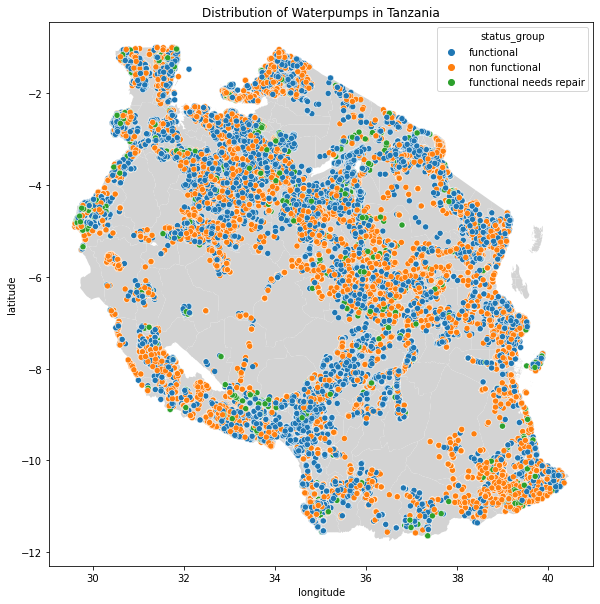

In [47]:
#create a new df 
mapdf = df1.copy()

#filter out the longitude values 
mapdf = mapdf[mapdf['longitude'] > 0]

#read the shape file with geopandas
tanzania_map = gpd.read_file('Districts and TC as 2020.shp')
# tanzania_map.plot(color='lightgrey',figsize=(8,8)); just look at the map of tanzania if you want to

crs = {'init':'EPSG:4326'} #define CRS
geometry = [Point(xy) for xy in zip(mapdf['longitude'], df['latitude'])] #create Points
geo_df = gpd.GeoDataFrame(mapdf, 
                          crs = crs, 
                          geometry = geometry) #define the geometry df

#plot the data
fig, ax = plt.subplots(figsize = (10,10))
tanzania_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
sns.scatterplot(x="longitude", y="latitude",data=mapdf,hue='status_group',ax=ax);
ax.set_title('Distribution of Waterpumps in Tanzania');

# Encoding

In [48]:
df1_cat = df1.select_dtypes(include=['object'])
df1_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59259 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date_recorded    59259 non-null  object
 1   funder           59259 non-null  object
 2   installer        59259 non-null  object
 3   basin            59259 non-null  object
 4   subvillage       59259 non-null  object
 5   region           59259 non-null  object
 6   lga              59259 non-null  object
 7   ward             59259 non-null  object
 8   public_meeting   59259 non-null  object
 9   recorded_by      59259 non-null  object
 10  permit           59259 non-null  object
 11  extraction_type  59259 non-null  object
 12  management       59259 non-null  object
 13  payment          59259 non-null  object
 14  water_quality    59259 non-null  object
 15  quantity         59259 non-null  object
 16  source           59259 non-null  object
 17  waterpoint_type  59259 non-null

In [49]:
#Cheking for the number of unique values in each column
cols=[]
unique_number = []
for name in df1_cat.columns:
    cols.append(name)
for item in cols:
    unique_number.append(df1_cat[item].nunique())
    
unique_dict =dict(zip(cols,unique_number))
unique_dict

{'date_recorded': 356,
 'funder': 1898,
 'installer': 2146,
 'basin': 9,
 'subvillage': 19288,
 'region': 21,
 'lga': 125,
 'ward': 2092,
 'public_meeting': 3,
 'recorded_by': 1,
 'permit': 3,
 'extraction_type': 18,
 'management': 12,
 'payment': 7,
 'water_quality': 8,
 'quantity': 5,
 'source': 10,
 'waterpoint_type': 7,
 'status_group': 3}

```Since there are certain features with a large number of unique values, we can try encoding the categorical data by using two different methods to see which works best: label encoding and one hot encoding```

## Label encoding approach

In [50]:
#instantiate the encoder
labelencoder = LabelEncoder()

#converting df1_cat into str type 
df1_cat = df1_cat.astype('str')

#fit and transform the categrical data
df1_cat_enc = df1_cat.apply(labelencoder.fit_transform)
df1_cat_enc.shape

(59259, 19)

## One-hot encoding

In [51]:
#using the get dummies method to one hot encode
df1_cat_ohe=pd.get_dummies(df1_cat)

#creating another copy of the df for analysis 
df3 = df1.copy()
df3.drop(df1_cat.columns,axis=1,inplace=True)

#concatenating the two df's
df3 = pd.concat([df3,df1_cat_ohe],axis=1)
df3.shape

(59259, 26021)

```We can see that having such a large df would be resource-intensive to work with.
Hence, we will use the LabelEncoding approach for our analysis ```

In [52]:
#making a copy for analysis
df2 = df1.copy()

#dropping the categorical columns
df2.drop(df1_cat_enc.columns,axis=1,inplace=True)
df2.info()

#combining the encoded and numeric data
df2 = pd.concat([df2,df1_cat_enc],axis=1)
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59259 entries, 0 to 59399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59259 non-null  float64
 1   gps_height         59259 non-null  int64  
 2   longitude          59259 non-null  float64
 3   latitude           59259 non-null  float64
 4   num_private        59259 non-null  int64  
 5   region_code        59259 non-null  int64  
 6   district_code      59259 non-null  int64  
 7   population         59259 non-null  int64  
 8   construction_year  59259 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 4.5 MB


,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,date_recorded,...,recorded_by,permit,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,status_group
0,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,171,...,0,0,3,7,2,6,1,8,1,0
1,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,216,...,0,2,3,11,0,6,2,5,1,0
2,25.0,686,37.460664,-3.821329,0,21,4,250,2009,144,...,0,2,3,7,4,6,1,0,2,0
3,0.0,263,38.486161,-11.155298,0,90,63,58,1986,21,...,0,2,14,7,0,6,0,3,2,2
4,0.0,0,31.130847,-1.825359,0,18,1,0,0,268,...,0,2,3,1,0,6,3,5,1,0


```We now have df2 with encoded values that we can use for modelling.
We will build 3 different baseline models and compare their accuracies. We will then select 
the one with the highest accuracy to fine tune and build upon.```

# Building baseline models

## Logistic Regression

In [53]:
#creating X and y
X=df2.drop('status_group',axis=1)
y=df2[['status_group']]

#splitting the train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

#instantiate logistic regression model
logreg = LogisticRegression(random_state=123)

#fit the model onto the train sets
logreg.fit(X_train,y_train)
logreg

#predict values of the model
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

#evaluate model 
names = ['functional','non functional','functional needs repair']
f1_logreg = round(f1_score(y_test,y_hat_test,average='macro'),3)
print(classification_report(y_test,y_hat_test,target_names=names))


                         precision    recall  f1-score   support

             functional       0.56      0.90      0.69      7945
         non functional       0.00      0.00      0.00      1091
functional needs repair       0.56      0.21      0.31      5779

               accuracy                           0.56     14815
              macro avg       0.38      0.37      0.33     14815
           weighted avg       0.52      0.56      0.49     14815



## Decision Tree 

In [54]:
#instantiate 
clf = DecisionTreeClassifier(criterion='entropy',random_state=123)

#fit the model onto the train sets
clf.fit(X_train,y_train)

#predict 
y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

#evaluate model
f1_tree = round(f1_score(y_test,y_hat_test,average='macro'),3)
print(classification_report(y_test,y_hat_test,target_names=names))


                         precision    recall  f1-score   support

             functional       0.79      0.79      0.79      7945
         non functional       0.38      0.38      0.38      1091
functional needs repair       0.76      0.76      0.76      5779

               accuracy                           0.75     14815
              macro avg       0.64      0.64      0.64     14815
           weighted avg       0.75      0.75      0.75     14815



## KNN model

In [55]:
#instantiate 
knn_baseline_model = KNeighborsClassifier()

#fit onto the data
knn_baseline_model.fit(X_train,y_train)

#predict
y_hat_train = knn_baseline_model.predict(X_train)
y_hat_test = knn_baseline_model.predict(X_test)

#evaluate model 
f1_knn = round(f1_score(y_test,y_hat_test,average='macro'),3)
print(classification_report(y_test,y_hat_test,target_names=names))

                         precision    recall  f1-score   support

             functional       0.65      0.76      0.70      7945
         non functional       0.31      0.16      0.21      1091
functional needs repair       0.61      0.52      0.56      5779

               accuracy                           0.62     14815
              macro avg       0.52      0.48      0.49     14815
           weighted avg       0.61      0.62      0.61     14815



## Selecting a model

In [56]:
#import the metrics library
print(f'f1-score of baseline logistic regression is {f1_logreg}')
print(f'f1-score of baseline decision tree is {f1_tree}')
print(f'f1-score of knn model is {f1_knn}')

f1-score of baseline logistic regression is 0.333
f1-score of baseline decision tree is 0.644
f1-score of knn model is 0.492


```Since, the decision tree baseline model has the highest performance score, we will build on that for further analysis```

# Decision Tree

In [57]:
#re-run the basline model so all variables are updated correctly
#for the train and test sets

#instantiate 
clf = DecisionTreeClassifier(criterion='entropy',random_state=123)

#fit the model onto the train sets
clf.fit(X_train,y_train)
clf

#predict 
y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

#evaluate model 
from sklearn.metrics import classification_report

print('TRAIN SCORES')
print(classification_report(y_train,y_hat_train,target_names=names))
print('--------------------------------------------------------------')
print('TEST SCORES')
print(classification_report(y_test,y_hat_test,target_names=names))

accuracy_baseline_train = accuracy_score(y_train,y_hat_train)
accuracy_baseline_test = accuracy_score(y_test,y_hat_test)

TRAIN SCORES
                         precision    recall  f1-score   support

             functional       1.00      1.00      1.00     24241
         non functional       1.00      1.00      1.00      3217
functional needs repair       1.00      1.00      1.00     16986

               accuracy                           1.00     44444
              macro avg       1.00      1.00      1.00     44444
           weighted avg       1.00      1.00      1.00     44444

--------------------------------------------------------------
TEST SCORES
                         precision    recall  f1-score   support

             functional       0.79      0.79      0.79      7945
         non functional       0.38      0.38      0.38      1091
functional needs repair       0.76      0.76      0.76      5779

               accuracy                           0.75     14815
              macro avg       0.64      0.64      0.64     14815
           weighted avg       0.75      0.75      0.75     148

```We can see that the model is clearly overfitting on the train dataset.```

## Hyperparameter Tuning

### max_depth

Text(0.5, 1.0, 'max_depth')

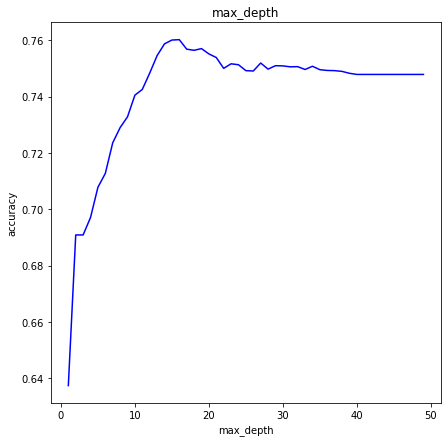

In [58]:
#creating a list of depth values
max_depth = np.arange(1,50)

#creating an empty list to store scores for each depth
accuracy_test_scores = []


# create a loop for the classifier to run with the different depth values
for depth in max_depth:
    
    #instantiate
    classifier = DecisionTreeClassifier(criterion='entropy',max_depth=depth,random_state=123)
    
    #fit the model
    classifier.fit(X_train,y_train)
    
    #predict values
    y_hat_test = classifier.predict(X_test)
    
    #calculate
    accuracy = accuracy_score(y_test,y_hat_test)    

    
    #add the scores to the list
    accuracy_test_scores.append(accuracy)

    
#visualize the data
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(7,7))
ax.plot(max_depth,accuracy_test_scores,c='b')
ax.set_xlabel('max_depth')
ax.set_ylabel('accuracy')
ax.set_title('max_depth')


```We can see that the accuracy for the model peaks at 15 before decreasing and levelling off```

### min_samples_split

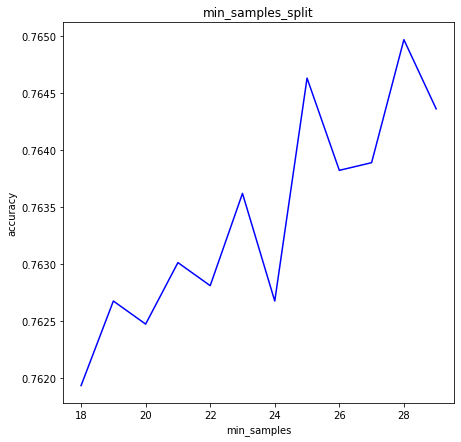

In [59]:
#use the optimum value of depth
depth = 15

#define a range of min_samples_for each split
min_samples_range = np.arange(18,30)

#create a loop with the optimum depth and different min_samples
#creating an empty list to store scores for each depth
accuracy_test_scores = []
# accuracy_scores = []
# precision_scores = []
# recall_scores = []

# create a loop for the classifier to run with the different depth values
for sample in min_samples_range:
    
    #instantiate
    classifier = DecisionTreeClassifier(criterion='entropy',max_depth=depth,min_samples_split=sample,random_state=123)
    
    #fit the model
    classifier.fit(X_train,y_train)
    
    #predict values
    y_hat_test = classifier.predict(X_test)
    
    #calculate
    accuracy = accuracy_score(y_test,y_hat_test)    
    
    #add the scores to the list
    accuracy_test_scores.append(accuracy)


#visualize
fig,ax = plt.subplots(figsize=(7,7))
ax.plot(min_samples_range,accuracy_test_scores,c='b')

ax.set_xlabel('min_samples')
ax.set_ylabel('accuracy')
ax.set_title('min_samples_split')
plt.show();


```We can see that the accuracy peaks at a sample value of 28```

### min_samples_leaf

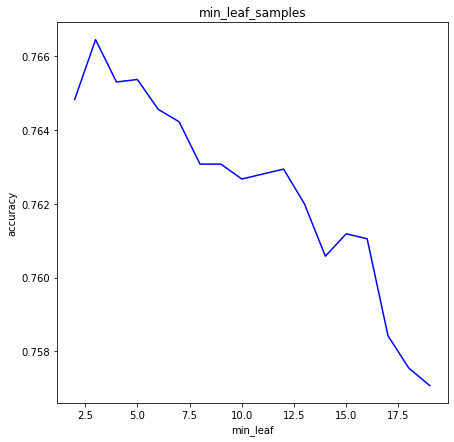

In [82]:
#use the optimum value of depth,min_samples_split
depth = 15
min_split = 28

#define a range of min_samples_for each split
min_leaf_range = np.arange(2,20)

#create a loop with the optimum depth and different min_samples
#creating an empty list to store scores for each depth
accuracy_test_scores = []

# create a loop for the classifier to run with the different depth values
for sample in min_leaf_range:
    
    #instantiate
    classifier = DecisionTreeClassifier(criterion='entropy',max_depth=depth,min_samples_split=min_split,
                                       min_samples_leaf=sample, random_state=123)
    
    #fit the model
    classifier.fit(X_train,y_train)
    
    #predict values
    y_hat_test = classifier.predict(X_test)
    
    #calculate
    accuracy = accuracy_score(y_test,y_hat_test)    
    
    #add the scores to the list
    accuracy_test_scores.append(accuracy)


#visual
fig,ax = plt.subplots(figsize=(7,7))
ax.plot(min_leaf_range,accuracy_test_scores,c='b')

ax.set_xlabel('min_leaf')
ax.set_ylabel('accuracy')
ax.set_title('min_leaf_samples')

plt.show();


```We can see that the peak value is 3```

### model with optimized parameters

In [61]:
#run the model with the optimized parameters
depth=15
samples=28
leaf=3

#instantiate
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=depth,min_samples_split=samples,
                                    min_samples_leaf=leaf,random_state=123)

#fit the model
classifier.fit(X_train,y_train)

#predict values
y_hat_train = classifier.predict(X_train)
y_hat_test = classifier.predict(X_test)

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,y_hat_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_hat_test,target_names=names))

accuracy_optimized_train = accuracy_score(y_train,y_hat_train)
accuracy_optimized_test = accuracy_score(y_test,y_hat_test)

f1_score_optimized_train = f1_score(y_train,y_hat_train,average='macro')
f1_score_optimized_test = f1_score(y_test,y_hat_test,average='macro')

TRAIN SCORES
---------------------------------------------------------
                         precision    recall  f1-score   support

             functional       0.81      0.90      0.85     24241
         non functional       0.69      0.35      0.46      3217
functional needs repair       0.84      0.78      0.81     16986

               accuracy                           0.81     44444
              macro avg       0.78      0.68      0.71     44444
           weighted avg       0.81      0.81      0.81     44444

TEST SCORES
----------------------------------------------------------
                         precision    recall  f1-score   support

             functional       0.77      0.86      0.81      7945
         non functional       0.52      0.27      0.36      1091
functional needs repair       0.78      0.73      0.76      5779

               accuracy                           0.77     14815
              macro avg       0.69      0.62      0.64     14815
        

## feature_importance

In [62]:
#creating a df with just feature_importance data
df_importance = pd.DataFrame({'features':X_train.columns,
                             'importance':classifier.feature_importances_})

df_importance.head()

,features,importance
0,amount_tsh,0.031239
1,gps_height,0.031743
2,longitude,0.098954
3,latitude,0.074584
4,num_private,0.000000


In [63]:
#sorting the importance in ascending order
df_importance_sorted = df_importance.sort_values(by=['importance'],ascending=True)
df_importance_sorted.head()

,features,importance
4,num_private,0.000000
18,recorded_by,0.000000
23,water_quality,0.004022
17,public_meeting,0.005108
19,permit,0.005273


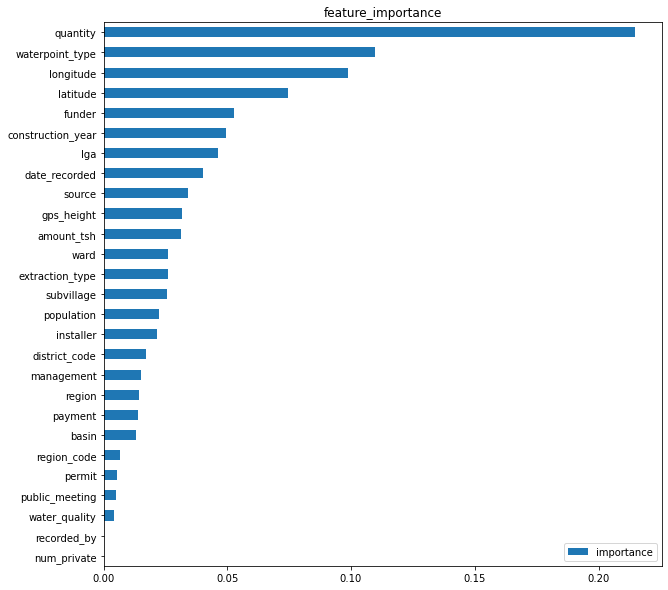

In [64]:
#plot the data
fig,ax=plt.subplots(figsize=(10,10))
df_importance_sorted.plot(kind='barh',ax=ax);
ax.set_yticklabels(df_importance_sorted['features'])
ax.set_title('feature_importance');
ax.legend(loc=4);

```Let's build a model based on the top_10 features to see if we can get better results```

### extracting top_10 features

In [65]:
#create a new df with the top_10 features alone

#get top10 features as a df
cols = df_importance_sorted['features'].tail(10)
cols=pd.DataFrame(data=cols)
cols

,features
1,gps_height
25,source
9,date_recorded
15,lga
8,construction_year
10,funder
3,latitude
2,longitude
26,waterpoint_type
24,quantity


In [66]:
#df with top10 features
df_top10 =df2[list(cols['features'])]

#combine with the target variable
df_top10 = pd.concat([df_top10,df1['status_group']],axis=1)

print(df_top10.shape)
df_top10.head()

(59259, 11)


,gps_height,source,date_recorded,lga,construction_year,funder,latitude,longitude,waterpoint_type,quantity,status_group
0,1390,8,171,51,1999,1370,-9.856322,34.938093,1,1,functional
1,1399,5,216,103,2010,469,-2.147466,34.698766,1,2,functional
2,686,0,144,108,2009,825,-3.821329,37.460664,2,1,functional
3,263,3,21,87,1986,1742,-11.155298,38.486161,2,0,non functional
4,0,5,268,26,0,20,-1.825359,31.130847,1,3,functional


## Decision Tree with the top10 features

### GridSearch CV

```Rather than use the earlier approach, where we built a baseline model and then tuned each hyper parameter seperately, we can combine all these steps into one using GridSearchCV```

In [67]:
#define X & y
X = df_top10.drop('status_group',axis=1)
y=df_top10[['status_group']]

#split the data
X_top10_train,X_top10_test,y_top10_train,y_top10_test = train_test_split(X,y,random_state=123)

#instantiate
clf_top10 = DecisionTreeClassifier(random_state=123)

#define the parameter grid
param_grid = {'max_depth': np.arange(15,20),
              'min_samples_split': np.arange(25,30),
              'min_samples_leaf': np.arange(3,10) 
             }

#instantiate
gs_tree = GridSearchCV(estimator=clf_top10,param_grid=param_grid,cv=5)

#fit
gs_tree.fit(X_top10_train,y_top10_train)

#predict
gs_tree_train = gs_tree.predict(X_top10_train)
gs_tree_test = gs_tree.predict(X_top10_test)

print('TRAIN SCORES')
print('--------------------------------------------------')
print(classification_report(y_top10_train,gs_tree_train))
print('TEST SCORES')
print('--------------------------------------------------')
print(classification_report(y_top10_test,gs_tree_test))

accuracy_grid_train = accuracy_score(y_top10_train,gs_tree_train)
accuracy_grid_test = accuracy_score(y_top10_test,gs_tree_test)

f1_score_gs_tree_train = f1_score(y_top10_train,gs_tree_train,average='macro')
f1_score_gs_tree_test = f1_score(y_top10_test,gs_tree_test,average='macro')

TRAIN SCORES
--------------------------------------------------
                         precision    recall  f1-score   support

             functional       0.82      0.91      0.86     24241
functional needs repair       0.65      0.34      0.44      3217
         non functional       0.85      0.78      0.81     16986

               accuracy                           0.82     44444
              macro avg       0.77      0.68      0.71     44444
           weighted avg       0.82      0.82      0.81     44444

TEST SCORES
--------------------------------------------------
                         precision    recall  f1-score   support

             functional       0.77      0.86      0.81      7945
functional needs repair       0.51      0.27      0.35      1091
         non functional       0.79      0.72      0.75      5779

               accuracy                           0.77     14815
              macro avg       0.69      0.62      0.64     14815
           weighted avg

In [68]:
#getting the best parameters
gs_tree.best_params_

{'max_depth': 19, 'min_samples_leaf': 7, 'min_samples_split': 27}

# Random Forest with top10 features


Let's use a poupular ensemble method called Random Forest on the top_10 features to and compare it to the GridSearchCV model to see if we can make imporvements. Random Forest combines Bootstrapping and Sub-Space Sampling methods to build models that are robust and immune to noise in the data.

In [69]:
#instantiante the classifier with the same parameters from earlier
forest=RandomForestClassifier(n_estimators=100,max_depth=19,min_samples_split=27,min_samples_leaf=7)

#fit the data
forest.fit(X_top10_train,y_top10_train)

#predict
forest_y_train = forest.predict(X_top10_train)
forest_y_test = forest.predict(X_top10_test)

#evaluate

# print('TRAIN SCORES')
# print('--------------------------------------------------')
# print(classification_report(y_top10_train,forest_y_train))
print('TEST SCORES')
print('--------------------------------------------------')
print(classification_report(y_top10_test,forest_y_test))

accuracy_forest_train = accuracy_score(y_top10_train,forest_y_train)
accuracy_forest_test = accuracy_score(y_top10_test,forest_y_test)

f1_score_rf_train = f1_score(y_top10_train,forest_y_train,average='macro')
f1_score_rf_test = f1_score(y_top10_test,forest_y_test,average='macro')

TEST SCORES
--------------------------------------------------
                         precision    recall  f1-score   support

             functional       0.76      0.92      0.83      7945
functional needs repair       0.71      0.21      0.33      1091
         non functional       0.84      0.72      0.77      5779

               accuracy                           0.79     14815
              macro avg       0.77      0.62      0.64     14815
           weighted avg       0.79      0.79      0.77     14815



# Visualize scores

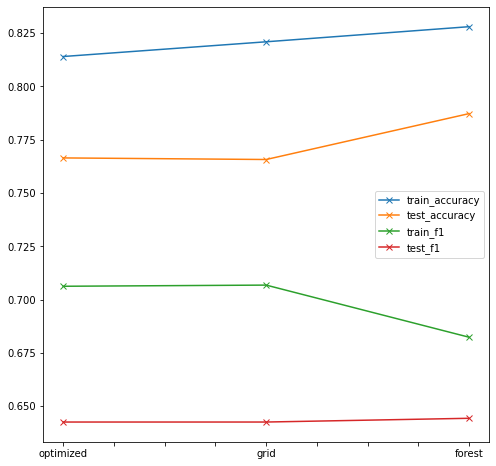

In [70]:
# create a dataframe of the scores for the different models
score_df = pd.DataFrame({'train_accuracy': [accuracy_optimized_train,accuracy_grid_train,accuracy_forest_train],
                        'test_accuracy': [accuracy_optimized_test,accuracy_grid_test,accuracy_forest_test],
                        'train_f1': [f1_score_optimized_train,f1_score_gs_tree_train,f1_score_rf_train],
                         'test_f1': [f1_score_optimized_test,f1_score_optimized_test,f1_score_rf_test]
                        }, index=['optimized','grid','forest'])


#plot the data
fig,ax=plt.subplots(figsize=(8,8))
score_df.plot(kind='line',ax=ax,marker='x');

## Confusion Matrix

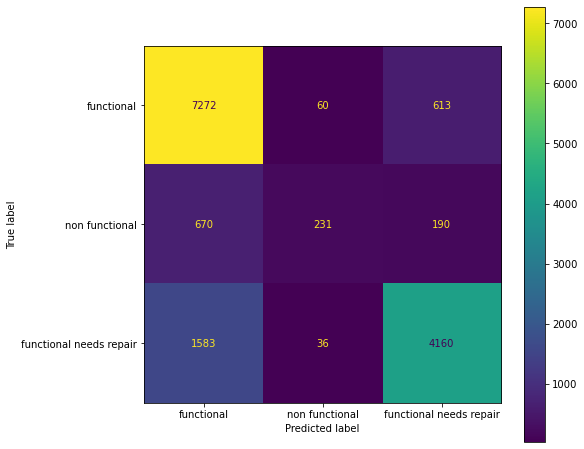

In [71]:
#Plot the confusion matrix of the random forest model
fig,ax=plt.subplots(figsize=(8,8))
plot_confusion_matrix(forest,X_top10_test,y_top10_test,ax=ax,display_labels=names);

```We can clearly see that the 'non-functional' class is a problem for the model ```

```Earlier, we built the model with only the top10 features based on feature importance. Let's now try and build a model with all the features and see if more data helps improve performance.```

# Random Forest with all the features

In [72]:
#define X,y
X=df2.drop('status_group',axis=1)
y=df2[['status_group']]

#using the cleaned dataset with all features
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

#instantiate the classifier
new_forest =RandomForestClassifier(n_estimators=100,max_depth=19,min_samples_split=27,min_samples_leaf=7)

#fit the data
new_forest.fit(X_train,y_train)

#predict 
y_hat_train = new_forest.predict(X_train)
y_hat_test = new_forest.predict(X_test)

#scores
# print('TRAIN SCORES')
# print('---------------------------------------------------------')
# print(classification_report(y_train,y_hat_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_hat_test,target_names=names))


TEST SCORES
----------------------------------------------------------
                         precision    recall  f1-score   support

             functional       0.77      0.92      0.84      7945
         non functional       0.72      0.21      0.33      1091
functional needs repair       0.85      0.74      0.79      5779

               accuracy                           0.80     14815
              macro avg       0.78      0.62      0.65     14815
           weighted avg       0.80      0.80      0.78     14815



## Confusion matrix

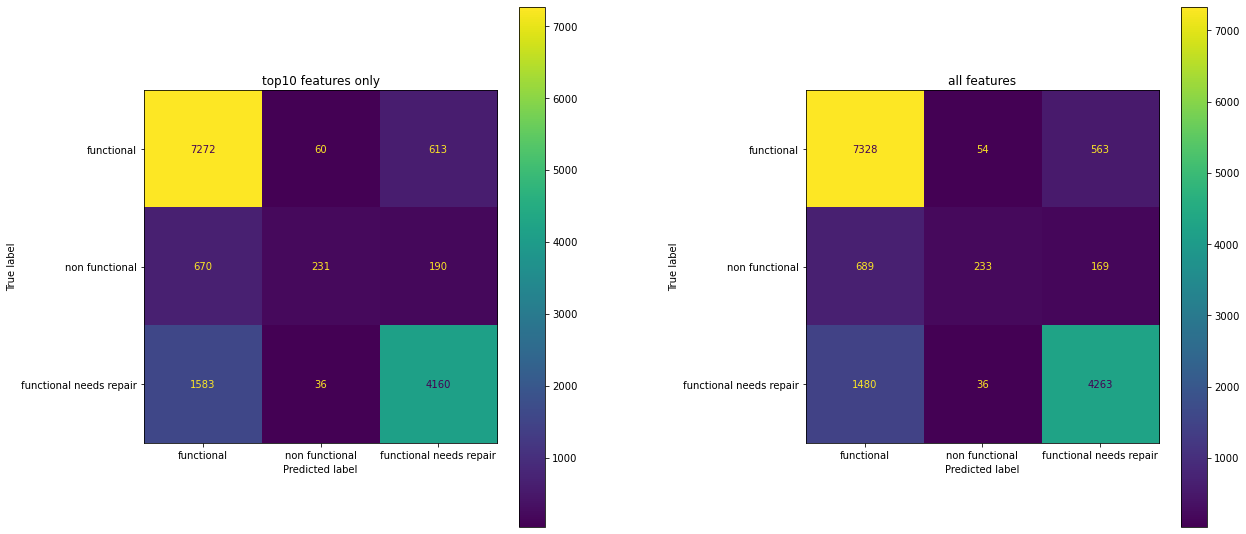

In [73]:
fig,(ax1,ax2)=plt.subplots(figsize=(20,10),nrows=1,ncols=2)
plot_confusion_matrix(forest,X_top10_test,y_top10_test,ax=ax1,display_labels=names)
plot_confusion_matrix(new_forest,X_test,y_test,ax=ax2,display_labels=names);
fig.tight_layout(pad=10.0)
ax1.set_title('top10 features only');
ax2.set_title('all features');

We can see that it makes no difference to the model.

# Examining the target feature

In [74]:
#examining the target variable
df1['status_group'].value_counts()

functional                 32186
non functional             22765
functional needs repair     4308
Name: status_group, dtype: int64

```Clearly, we can see an imbalance between the classes. We can try to train a model with equal representation from each class and check the results.```

# Training a model with a balanced data set

In [75]:
#seperate each class into a seperate class with the same number of rows as the repair class
functional = df2[df2['status_group'] == 0]
functional = functional.iloc[0:4308,:]

non_functional = df2[df2['status_group'] == 2]
non_functional = non_functional.iloc[0:4308,:]

repair = df2[df2['status_group'] == 1]
repair['status_group'].value_counts()

#concatenate all three df's 
new_df = pd.concat([functional,non_functional,repair])

#check the value counts
new_df['status_group'].value_counts()

2    4308
1    4308
0    4308
Name: status_group, dtype: int64

In [76]:
#building the baseline model

#define X,y
X=new_df.drop('status_group',axis=1)
y=new_df[['status_group']]

#using the cleaned dataset with all features
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(X,y,random_state=123)

#instantiate the classifier
newdf_forest =RandomForestClassifier()

#fit the data on the new_df
forest1=newdf_forest.fit(X_train_new,y_train_new)

#predict score on the new_df
y_hat_train_new = new_forest.predict(X_train_new)
y_hat_test_new = new_forest.predict(X_test_new)

#scores
# print('TRAIN SCORES')
# print('---------------------------------------------------------')
# print(classification_report(y_train_new,y_hat_train_new,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test_new,y_hat_test_new,target_names=names))


TEST SCORES
----------------------------------------------------------
                         precision    recall  f1-score   support

             functional       0.53      0.95      0.68      1074
         non functional       0.96      0.23      0.37      1067
functional needs repair       0.80      0.79      0.79      1090

               accuracy                           0.66      3231
              macro avg       0.77      0.65      0.62      3231
           weighted avg       0.77      0.66      0.62      3231



In [77]:
# with the model trained on the balanced dataset, let's check for predictions on the unbalanced dataset
y_preds_train = forest1.predict(X_train) # original df
y_preds_test = forest1.predict(X_test) #original df

print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_preds_test,target_names=names))

TEST SCORES
----------------------------------------------------------
                         precision    recall  f1-score   support

             functional       0.87      0.70      0.77      7945
         non functional       0.34      0.95      0.50      1091
functional needs repair       0.82      0.77      0.79      5779

               accuracy                           0.74     14815
              macro avg       0.68      0.81      0.69     14815
           weighted avg       0.81      0.74      0.76     14815



## Confusion Matrix

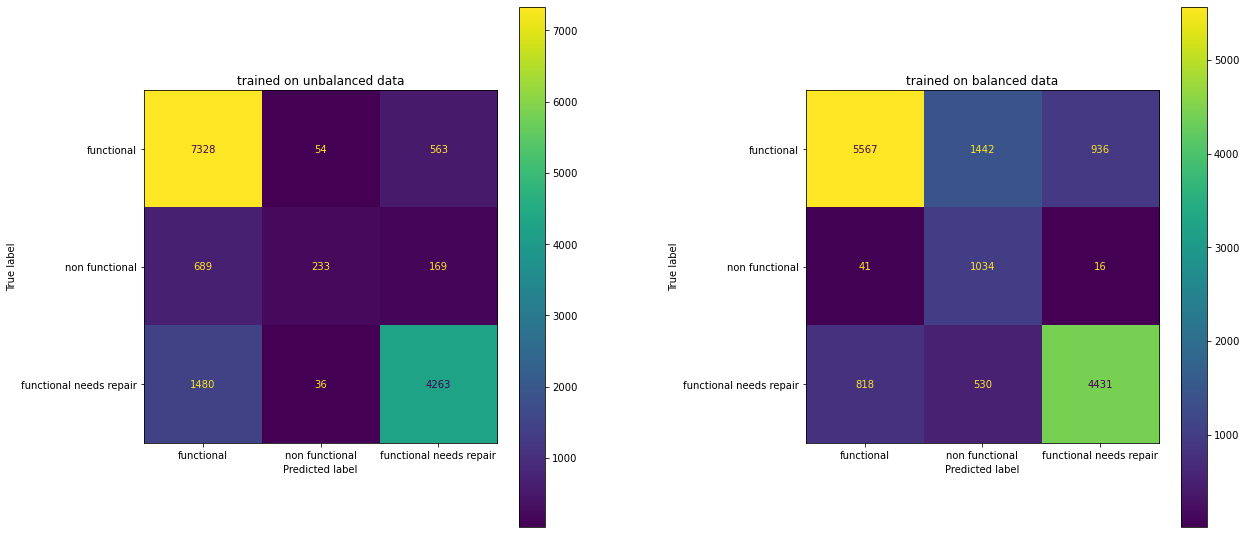

In [78]:
fig,(ax1,ax2)=plt.subplots(figsize=(20,10),nrows=1,ncols=2)
plot_confusion_matrix(new_forest,X_test,y_test,ax=ax1,display_labels=names)
plot_confusion_matrix(forest1,X_test,y_test,ax=ax2,display_labels=names);
fig.tight_layout(pad=10.0)
ax1.set_title('trained on unbalanced data');
ax2.set_title('trained on balanced data');

# Random forest model on the balanced dataset 

In [79]:
#instantaiate with optimized parameters from before
forest2 = RandomForestClassifier(max_depth=15,min_samples_split=28,min_samples_leaf=3,random_state=42)

#fit the data on the balanced dataset
forest2.fit(X_train_new,y_train_new)

# predict data on the original df
y_hat_test_preds =  forest2.predict(X_test) # original df

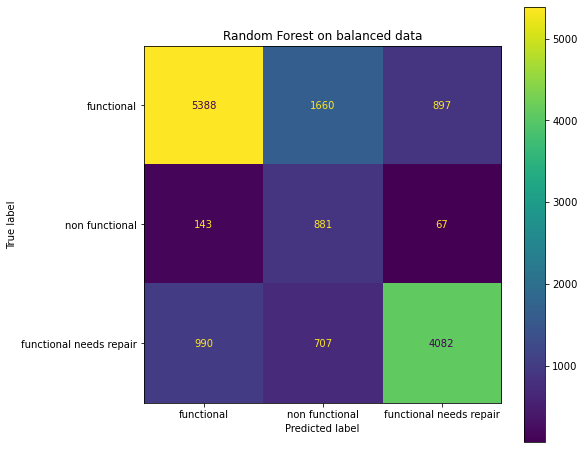

In [80]:
fig,ax=plt.subplots(figsize=(8,8))
plot_confusion_matrix(forest2,X_test,y_test,display_labels=names,ax=ax);
ax.set_title('Random Forest on balanced data');

In [81]:
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_hat_test_preds,target_names=names))

TEST SCORES
----------------------------------------------------------
                         precision    recall  f1-score   support

             functional       0.83      0.68      0.74      7945
         non functional       0.27      0.81      0.41      1091
functional needs repair       0.81      0.71      0.75      5779

               accuracy                           0.70     14815
              macro avg       0.64      0.73      0.64     14815
           weighted avg       0.78      0.70      0.72     14815



# Next Steps

1. Possibly re-frame this as a binary classification problem i.e functional vs non-functional and see if we can build a better model. 
2. Re-create the model with equal number of data points between functional and non-functional. Optimize parameters on this balanced dataset and test it on validation data to check for performance.

